In [3]:
### Trim Audio ###
from pydub import AudioSegment

def trim_wav(input_file, output_file, start_time, end_time):
    # Load the audio file
    audio = AudioSegment.from_wav(input_file)

    # Convert times to milliseconds
    start_time_ms = start_time * 1000
    end_time_ms = end_time * 1000

    # Trim the audio
    trimmed_audio = audio[start_time_ms:end_time_ms]

    # Export the trimmed audio to a new file
    trimmed_audio.export(output_file, format="wav")

if __name__ == "__main__":
    # Example usage
    input_file = "rickroll.wav"  # Replace with the path to your input WAV file
    output_file = "rickroll1.wav"  # Replace with the desired output file path
    start_time = 3  # Replace with the start time in seconds
    end_time = 6  # Replace with the end time in seconds

    trim_wav(input_file, output_file, start_time, end_time)

    print(f"Audio trimmed from {start_time} to {end_time} seconds and saved to {output_file}")


Audio trimmed from 3 to 6 seconds and saved to rickroll1.wav


In [22]:
### Increase Gain ###
from pydub import AudioSegment

def increase_volume(input_file, output_file, gain_dB):
    # Load the audio file
    audio = AudioSegment.from_wav(input_file)

    # Increase the volume
    increased_audio = audio + gain_dB

    # Export the increased volume audio to a new file
    increased_audio.export(output_file, format="wav")

if __name__ == "__main__":
    # Example usage
    input_file = "google_20.wav"  # Replace with the path to your input WAV file
    output_file = "google_20_gain10.wav"  # Replace with the desired output file path
    gain_dB = 10  # Replace with the desired gain in decibels

    increase_volume(input_file, output_file, gain_dB)

    print(f"Audio volume increased by {gain_dB} dB and saved to {output_file}")


Audio volume increased by 10 dB and saved to google_20_gain10.wav


In [11]:
### Resample Audio File ###
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.signal import resample

def resample_wav(input_file, output_file, target_sample_rate):
    # Read the original WAV file
    original_sample_rate, original_signal = wavfile.read(input_file)

    # Calculate the resampling factor
    resample_factor = target_sample_rate / original_sample_rate

    # Resample the signal
    resampled_signal = resample(original_signal, int(len(original_signal) * resample_factor))

    # Save the resampled signal to a new WAV file
    wavfile.write(output_file, target_sample_rate, np.int16(resampled_signal))

if __name__ == "__main__":
    input_wav = "ps_base.wav"  # Replace with your original WAV file
    output_wav = "ps_base.wav"
    target_sample_rate = 96000  # 96 kHz target sample rate

    resample_wav(input_wav, output_wav, target_sample_rate)


In [20]:
### Modulate to Ultrasonic ###
import numpy as np
import scipy.io.wavfile as wavfile

def add_ultrasonic_modulation(signal, sample_rate, ultrasonic_freq):
    t = np.arange(len(signal)) / sample_rate
    ultrasonic_wave = np.sin(2 * np.pi * ultrasonic_freq * t)

    # Check if the input signal has multiple channels
    if signal.ndim == 1:
        modulated_signal = signal * ultrasonic_wave
    else:
        modulated_signal = np.zeros_like(signal)
        for channel in range(signal.shape[1]):
            modulated_signal[:, channel] = signal[:, channel] * ultrasonic_wave

    return modulated_signal

def main(input_file, output_file):
    # Read the WAV file
    sample_rate, original_signal = wavfile.read(input_file)

    # Modulate the signal with a higher frequency (e.g., 40 kHz)
    ultrasonic_freq = 10000
    modulated_signal = add_ultrasonic_modulation(original_signal, sample_rate, ultrasonic_freq)

    # Save the modified signal to a new WAV file
    wavfile.write(output_file, sample_rate, np.int16(modulated_signal))

if __name__ == "__main__":
    input_wav = "ps_base.wav"
    output_wav = "ps_10.wav"
    main(input_wav, output_wav)


In [30]:
### WAV to CSV ###
import sys, os, os.path
from scipy.io import wavfile
import pandas as pd

input_filename = "ps_base.wav"
if input_filename[-3:] != 'wav':
    print('WARNING!! Input File format should be *.wav')
    sys.exit()

samrate, data = wavfile.read(input_filename)
print('Load is Done! \n')

wavData = pd.DataFrame(data)

if len(wavData.columns) == 2:
    print('Stereo .wav file\n')
    wavData.columns = ['R', 'L']
    stereo_R = pd.DataFrame(wavData['R'])
    stereo_L = pd.DataFrame(wavData['L'])
    print('Saving...\n')
    stereo_R.to_csv(str(input_filename[:-4] + "_Output_stereo_R.csv"), mode='w')
    stereo_L.to_csv(str(input_filename[:-4] + "_Output_stereo_L.csv"), mode='w')
    # wavData.to_csv("Output_stereo_RL.csv", mode='w')
    print('Save is done ' + str(input_filename[:-4]) + '_Output_stereo_R.csv , '
                          + str(input_filename[:-4]) + '_Output_stereo_L.csv')

elif len(wavData.columns) == 1:
    print('Mono .wav file\n')
    wavData.columns = ['M']

    wavData.to_csv(str(input_filename[:-4] + "_Output_mono.csv"), mode='w')

    print('Save is done ' + str(input_filename[:-4]) + '_Output_mono.csv')

else:
    print('Multi channel .wav file\n')
    print('number of channel : ' + len(wavData.columns) + '\n')
    wavData.to_csv(str(input_filename[:-4] + "Output_multi_channel.csv"), mode='w')

    print('Save is done ' + str(input_filename[:-4]) + 'Output_multi_channel.csv')

Load is Done! 

Stereo .wav file

Saving...

Save is done ps_base_Output_stereo_R.csv , ps_base_Output_stereo_L.csv


C:\Users\Corynthian\AppData\Local\Temp\ipykernel_15424\3269296532.py:25: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Convert to dB


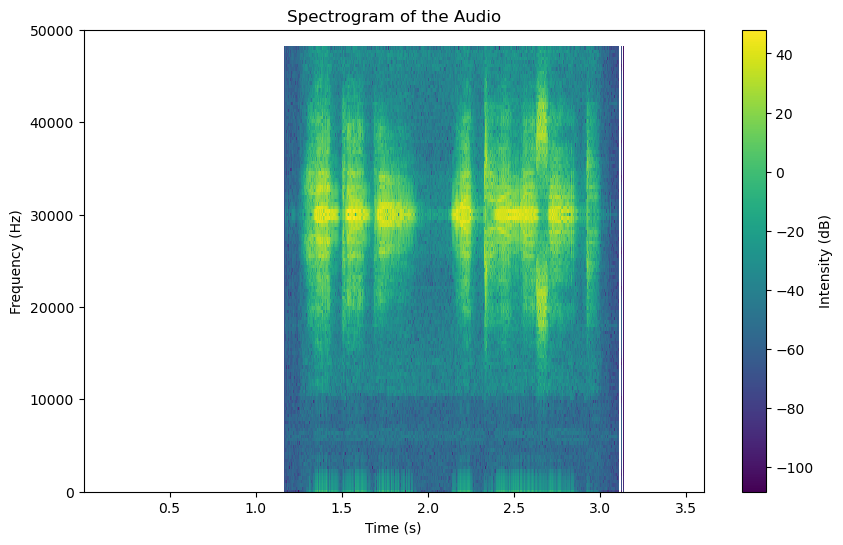

In [17]:
### Plot Spectogram ###
from pydub import AudioSegment
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# Load the MP3 file
audio = AudioSegment.from_file("google_30.wav", format="wav")

# Convert AudioSegment to raw audio data
samples = np.array(audio.get_array_of_samples())

# Sample rate (samples per second)
sample_rate = audio.frame_rate

# Convert to mono if stereo
if audio.channels > 1:
    samples = np.mean(samples.reshape(-1, audio.channels), axis=1)

# Calculate the spectrogram
f, t, Sxx = spectrogram(samples, fs=sample_rate)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Convert to dB
plt.title('Spectrogram of the Audio')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.ylim(0, 50000)  # Limit the y-axis to human hearing range
plt.colorbar(label='Intensity (dB)')
plt.show()